In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [5]:
#loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('calories.csv')

In [6]:
#print the first fives rows of the dataFrame
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
exercise_data = pd.read_csv('exercise.csv')

In [8]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
#combining the two DataFrame
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [10]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
#checking the number of rows and columns
calories_data.shape

(15000, 9)

In [12]:
#getting info about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [13]:
#checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [14]:
#data analysis
#get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [15]:
#data visualization
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

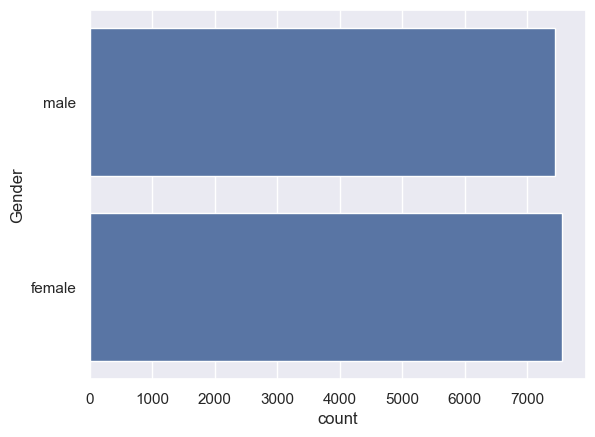

In [16]:
#ploting the gender column in count plot
sns.countplot(calories_data['Gender'])

C:\Users\hicha\AppData\Local\Temp\ipykernel_37328\3249389884.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

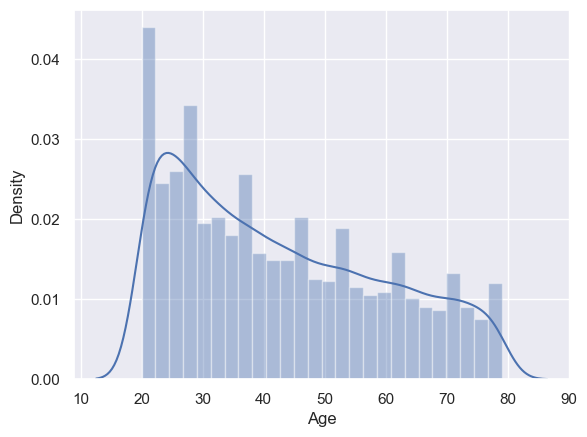

In [17]:
#finding the distribution of age column
sns.distplot(calories_data['Age'])

C:\Users\hicha\AppData\Local\Temp\ipykernel_37328\2853917084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

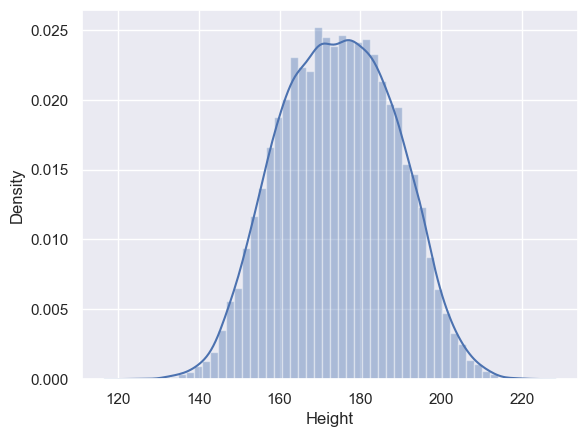

In [18]:
#finding the distribution of Height	 column
sns.distplot(calories_data['Height'])

C:\Users\hicha\AppData\Local\Temp\ipykernel_37328\1056216828.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

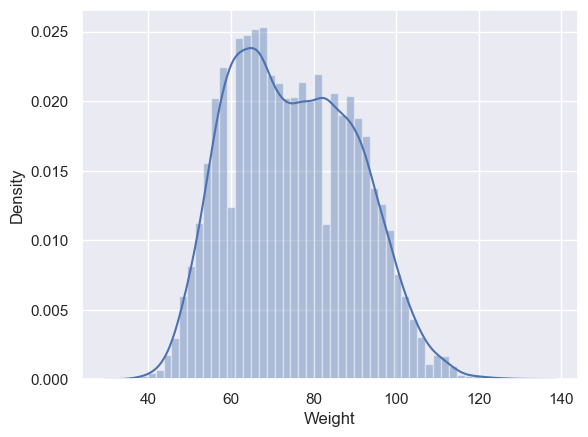

In [19]:
#finding the distribution of Weight column
sns.distplot(calories_data['Weight'])

In [20]:
 #finding the correlation in the dataset
#positive correlation
#negative correlation
# Sélectionne automatiquement SEULEMENT les colonnes numériques avant de calculer la corrélation
correlation = calories_data.select_dtypes(include=['number']).corr()

<Axes: >

     ---------------------------------------- 8.1/8.1 MB 900.5 kB/s eta 0:00:00
     ------------------------------------ 294.9/294.9 kB 492.5 kB/s eta 0:00:00
     ---------------------------------------- 8.9/8.9 MB 503.6 kB/s eta 0:00:00
     -------------------------------------- 72.0/72.0 MB 496.7 kB/s eta 0:00:00
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl (2.3 MB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl (73 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
  Using cached scipy-1.16.3-cp311-cp311-win_amd64.whl (38.7 MB)
  Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\hicha\\Downloads\\Calories Burnt Prediction\\venv\\Lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp311-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


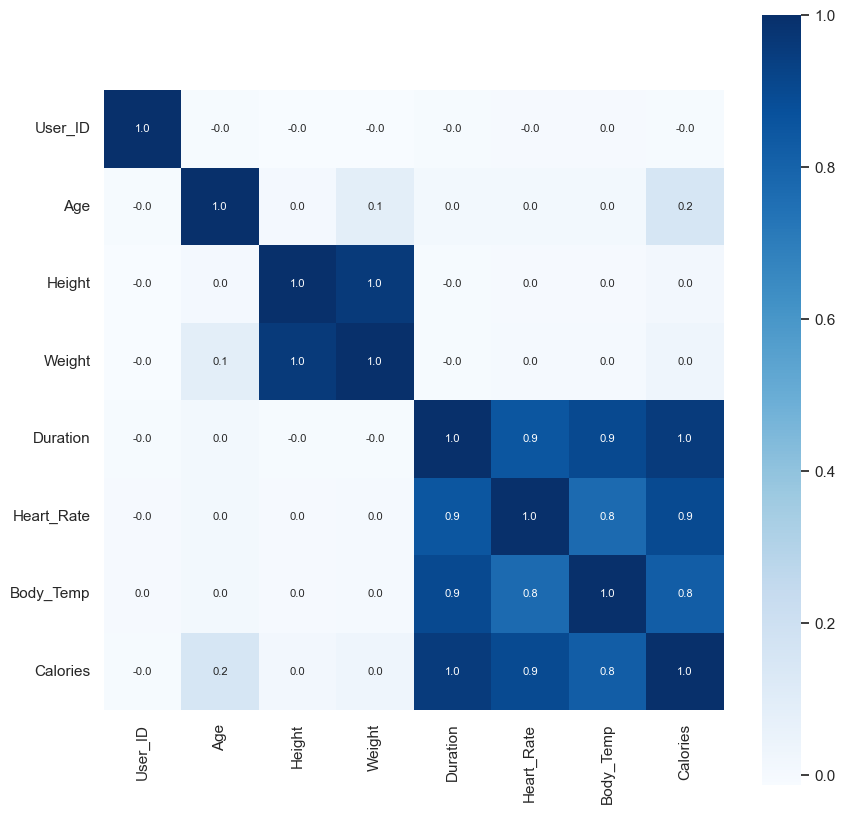

In [21]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [22]:
#converting the text data to numerical values
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

C:\Users\hicha\AppData\Local\Temp\ipykernel_37328\2851756767.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [23]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [24]:
#separating features and target
X = calories_data.drop(['User_ID', 'Calories'], axis=1)
Y = calories_data['Calories']

In [25]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [26]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [27]:
#spliting the data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [29]:
#model training
#XGBoost Regressor
model = XGBRegressor()

In [30]:
#training the model with X_train
model.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [31]:
#evaluation 
#prediction on test data
test_data_prediction = model.predict(X_test)

In [32]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [33]:
# Calculer l'Erreur Absolue Moyenne (MAE) 
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [34]:
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  1.4833678883314132


In [35]:
import pickle

# Save the Model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Saved model.pkl successfully!")

Saved model.pkl successfully!
